In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tempfile
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.simplefilter('ignore')

import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from banditpylib.arms import BernoulliArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import SinglePlayerProtocol, trial_data_messages_to_dict
from banditpylib.learners.mab_learner import UCB, EpsGreedy, ThompsonSampling

In [2]:
horizon = 2000
means = np.array([0.3, 0.5, 0.7])
arms = [BernoulliArm(mean) for mean in means]
bandit = MultiArmedBandit(arms=arms)
learners = [EpsGreedy(arm_num=len(arms), name='Epsilon Greedy'), 
            UCB(arm_num=len(arms), name='UCB'),
            ThompsonSampling(arm_num=len(arms), name='Thompson Sampling')]
# intermediate regrets to record for each trial of a game
intermediate_regrets = list(range(0, horizon+1, 50))
temp_file = tempfile.NamedTemporaryFile()

In [3]:
# simulator
game = SinglePlayerProtocol(bandit, learners, intermediate_regrets=intermediate_regrets, horizon=horizon)
# start playing the game
# add `debug=True` for debugging purpose
game.play(trials=200, output_filename=temp_file.name)

INFO:absl:start Epsilon Greedy's play with multi_armed_bandit
INFO:absl:Epsilon Greedy's play with multi_armed_bandit runs 7.34 seconds.
INFO:absl:start UCB's play with multi_armed_bandit
INFO:absl:UCB's play with multi_armed_bandit runs 6.87 seconds.
INFO:absl:start Thompson Sampling's play with multi_armed_bandit
INFO:absl:Thompson Sampling's play with multi_armed_bandit runs 6.86 seconds.


In [4]:
data_df = trial_data_messages_to_dict(temp_file.name)

In [5]:
data_df.head()

,rounds,total_actions,regret,other,bandit,learner
0,0,0,0.0,0.0,multi_armed_bandit,Epsilon Greedy
1,50,50,6.0,0.0,multi_armed_bandit,Epsilon Greedy
2,100,100,7.0,0.0,multi_armed_bandit,Epsilon Greedy
3,150,150,5.0,0.0,multi_armed_bandit,Epsilon Greedy
4,200,200,7.0,0.0,multi_armed_bandit,Epsilon Greedy


<AxesSubplot:xlabel='total_actions', ylabel='regret'>

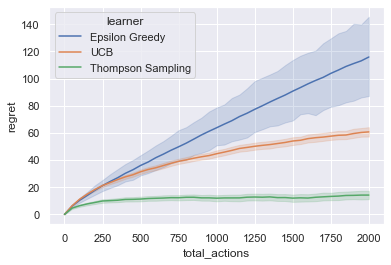

In [6]:
sns.lineplot(x='total_actions', y='regret', hue='learner', data=data_df)